<a href="https://colab.research.google.com/github/varunnayak26/deep-learning-pytorch-exercise/blob/master/PyTorch_Basics_part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch basics. Referred tutorials from https://github.com/MorvanZhou

In [0]:
import torch
import numpy as np
import pandas as pd
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

Lets make our plot outputs appear and be stored within the notebook.

In [0]:
%matplotlib inline

### Numpy and PyTorch

In [213]:
# Make a simple numpy array
np_data = np.array([1,2,3,4])
np_data

array([1, 2, 3, 4])

In [214]:
# Make a tensor from a numpy array
np_tensor = torch.from_numpy(np_data)
np_tensor

tensor([1, 2, 3, 4])

In [215]:
# Change tensor back to numpy array
np_array = np_tensor.numpy()
np_array

array([1, 2, 3, 4])

In [216]:
# Change dtype from torch.int64 to torch.float32
np_tensor_float = torch.FloatTensor(np_data)
np_tensor_float

tensor([1., 2., 3., 4.])

In [217]:
# Make a simple 1D tensor with negative numbers
neg_data = [-1,-2,-3,-4]
neg_data_tensor = torch.tensor(neg_data)
neg_data_tensor

tensor([-1, -2, -3, -4])

In [218]:
# Get absolute value of a tensor
tensor_abs = torch.abs(np_tensor_float)
tensor_abs

tensor([1., 2., 3., 4.])

In [219]:
# Calculate mean of a tensor
mean = torch.mean(tensor_abs)
mean

tensor(2.5000)

In [220]:
# Apply sigmoid function to a tensor
sigmoid = nn.Sigmoid()
a = torch.randn(4)
print(sigmoid(a))

tensor([0.6706, 0.4013, 0.7800, 0.4900])


In [221]:
# Alternative way to apply sigmoid function to a tensor
a.sigmoid()

tensor([0.6706, 0.4013, 0.7800, 0.4900])

In [222]:
# Matrix multiplication
x = torch.tensor([[1,2,3],[4,5,6]]) # 2x3 matrix
y = torch.tensor([[1,2],[3,4],[5,6]]) # 3x2 matrix
print(torch.mm(x,y)) # Result should be 2x2 matrix

tensor([[22, 28],
        [49, 64]])


In [223]:
# Alternative way to compute matrix multiplication
x.mm(y)

tensor([[22, 28],
        [49, 64]])

In [224]:
# torch.dot() treats both x and y as 1D vectors and computes their inner product
torch.dot(x.view(-1),y.view(-1))

tensor(91)

### Variable and Autograd


`Autograd` is a PyTorch package for the differentiation for all operations on Tensors.

In [0]:
from torch.autograd import Variable

A `Variable` wraps a Tensor. It supports nearly all the API’s defined by a Tensor. Variable also provides a backward method to perform backpropagation. 

Reference : https://jhui.github.io/2018/02/09/PyTorch-Variables-functionals-and-Autograd

`requires_grad` indicates whether a variable is trainable.

In [226]:
# Variable wraps a Tensor
temp_tensor = torch.tensor([[1,2],[3,4]]).type(torch.FloatTensor)
x = Variable(temp_tensor, requires_grad=True)
x

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [227]:
x.data

tensor([[1., 2.],
        [3., 4.]])

In [228]:
out = torch.mean(x*x)
out

tensor(7.5000, grad_fn=<MeanBackward1>)

`backward()` executes the backward pass and computes all the gradients automatically. 

In [0]:
out.backward()

`x.grad` below returns $\frac{\partial out}{\partial x}$ which in this example is $\frac{x}{2}$

In [230]:
print(x.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


### Activation

In [0]:
x = torch.linspace(-5, 5, 100)
x_np = x.numpy()

In [0]:
y_relu = F.relu(x).numpy()
y_sigmoid = torch.sigmoid(x).numpy()
y_tanh = torch.tanh(x).numpy()
y_softplus = F.softplus(x).numpy()

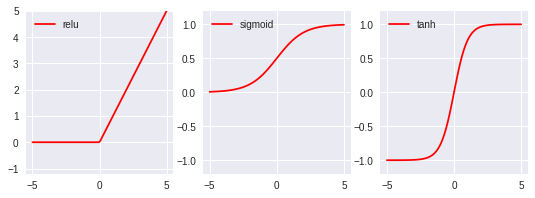

In [233]:
plt.figure(1, figsize=(9,3))

plt.subplot(131)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1.2, 5))
plt.legend(loc='best')

plt.subplot(132)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(133)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')


plt.show()

### Regression

In [234]:
torch.manual_seed(1)

In [235]:
# Generate 100 equally spaced points from -1 to 1
x = torch.linspace(-1, 1, 100)
x.shape

torch.Size([100])

In [236]:
# Reshape input
x = torch.unsqueeze(x, dim=1)
print(x.shape)

torch.Size([100, 1])


In [237]:
curve_shape = 2 # y=x^2 curve
y = x.pow(curve_shape) + 0.2*torch.rand(x.size()) # Introduce noise in the output
print(y.shape)

torch.Size([100, 1])


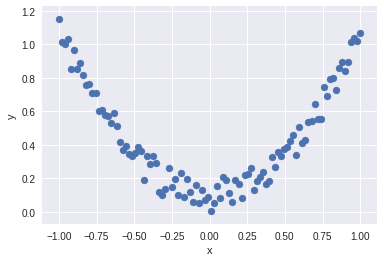

In [238]:
# Plot the points
plt.scatter(x.data.numpy(), y.data.numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Create a Fully connected network model with 1 hidden layer

In [0]:
class Model(nn.Module):
  def __init__(self, n_hidden):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(1, n_hidden) # 1 input feature, n hidden nodes
    self.fc2 = nn.Linear(n_hidden, 1) # 1 output feature
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x  

In [240]:
# Create model with 10 units in the hidden layer
model = Model(n_hidden = 10)
model

Model(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [0]:
# Mean Squared Loss as its a regression problem
criterion = nn.MSELoss()
# Stochastic Gradient Descent for optimization
optimizer = optim.SGD(model.parameters(), lr=0.2)

Training

In [0]:
epochs = 200
y_hat_arr = [] # for plotting
loss_arr = []  # for plotting
for e in range(epochs):
  y_hat = model(x)
  y_hat_arr.append(y_hat)
  loss = criterion(y_hat, y)
  loss_arr.append(loss.item())
  optimizer.zero_grad()   # clear gradients for next train
  loss.backward()         # backpropagation to compute gradients
  optimizer.step()        # apply gradients and updates the weights

Lets plot model loss and see how it behaves with epochs.

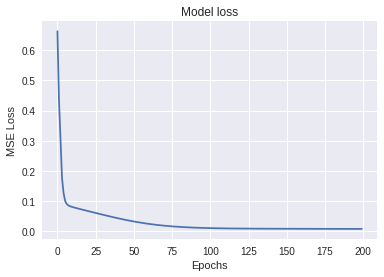

In [243]:
# Plot error curve
plt.title('Model loss')
plt.ylabel('MSE Loss')
plt.xlabel('Epochs')
plt.plot(loss_arr)
plt.show()

Animating the model prediction to visualize how the accuracy improves with epochs and eventually close to true output.

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

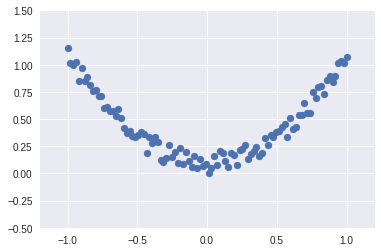

In [245]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-1.2,1.2))
ax.set_ylim((-0.5,1.5))
plt.scatter(x.data.numpy(), y.data.numpy())
line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x_anim = list(x.data.numpy())
    y_anim = y_hat_arr[i].data.numpy()
    line.set_data(x_anim, y_anim)
    return (line,)

In [247]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)
HTML(anim.to_html5_video())

### Classification

Get sample data for binary classification

In [248]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/gradient-descent/data.csv

--2019-04-04 13:51:23--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/gradient-descent/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1778 (1.7K) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.74K  --.-KB/s    in 0s      

2019-04-04 13:51:23 (239 MB/s) - ‘data.csv.1’ saved [1778/1778]



In [249]:
torch.manual_seed(1)

Custom function to plot data points for binary classification

In [0]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

Custom function to plot color-coded regions with the help of contourf.

Reference : https://www.datahubbs.com/deep-learning-101-first-neural-network-with-pytorch/

In [0]:
def plot_results(model, X_test, Y_test, y_hat_test):
    # Pass test data
    #y_hat_test = self.predict(X_test)
    y_hat_test_class = np.where(y_hat_test<0.5, 0, 1)
    #print("Test Accuracy {:.2f}%".format(self.calculate_accuracy(y_hat_test_class, Y_test) * 100))

    # Plot the decision boundary
    # Determine grid range in x and y directions
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    # Set grid spacing parameter
    spacing = min(x_max - x_min, y_max - y_min) / 100

    # Create grid
    XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                   np.arange(y_min, y_max, spacing))

    # Concatenate data to match input
    data = np.hstack((XX.ravel().reshape(-1,1), 
                      YY.ravel().reshape(-1,1)))

    # Pass data to predict method
    data_t = torch.FloatTensor(data)
    db_prob = model(data_t)

    clf = np.where(db_prob<0.5,0,1)

    Z = clf.reshape(XX.shape)
    
    plt.contourf(XX, YY, Z, cmap=plt.cm.Accent, alpha=0.5)

    #print(type(X_test),type(Y_test))
    #print(X_test[:,0].numpy().shape,X_test[:,1].numpy().shape,Y_test.reshape(-1).shape)
    plt.scatter(X_test[:,0], X_test[:,1], c=Y_test.reshape(-1), 
                cmap=plt.cm.Accent)
    plt.show()

Custom function to shuffle 2 arrays synchronously

In [0]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

Lets plot the data

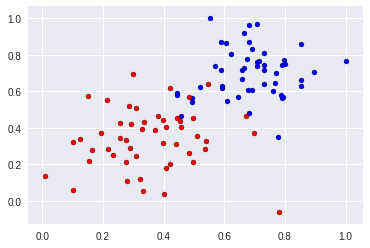

In [253]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
X,y = unison_shuffled_copies(X,y)
#plt.figure(figsize=(12,8))
#plt.scatter(X[:,0], X[:,1], c=y)
#plt.title('Classification')
#plt.show()
plot_points(X,y)

Create a Fully connected network model with 1 hidden layer

In [0]:
class Model(nn.Module):
  def __init__(self, n_hidden):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(2, n_hidden) # 2 input feature, n hidden nodes
    self.fc2 = nn.Linear(n_hidden, 1) # Single output node for binary classification
  
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    return x  


**Alternate way to build your model**
```
model = nn.Sequential(
    nn.Linear(n_input_dim, n_hidden),
    nn.ReLU(),
    nn.Linear(n_hidden, n_output),
    nn.Sigmoid())
    
print(model)
```

In [255]:
# Create model with n units in the hidden layer where n is a hyper-parameter
model = Model(n_hidden = 10)
model

Model(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [0]:
# Binary cross entropy loss as its a binary classification problem
criterion = nn.BCELoss()
# Stochastic Gradient Descent for optimization
learning_rate = 0.01 # hyper-parameter
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Generate data to plot decision boundary for animation

In [0]:
# Determine grid range in x and y directions
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

# Set grid spacing parameter
spacing = min(x_max - x_min, y_max - y_min) / 100

# Create grid
XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))

# Concatenate data to match input
data = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))

# Pass data to predict method
data_t = torch.FloatTensor(data)

Training

In [0]:
epochs = 100 # hyper-parameter
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).view(y.shape[0],-1)
loss_arr = []  # for plotting
out_arr = [] # for animation
Z_arr = [] # for animation
animation_req = True

for e in range(epochs):
  out = model(X_tensor)
  if animation_req:
    out_arr.append(out)
    db_prob = model(data_t)
    clf = np.where(db_prob<0.5,0,1)
    Z = clf.reshape(XX.shape)
    Z_arr.append(Z)
  loss = criterion(out, y_tensor)
  loss_arr.append(loss.item())
  optimizer.zero_grad()   # clear gradients for next train
  loss.backward()         # backpropagation to compute gradients
  optimizer.step()        # apply gradients and updates the weights

Lets plot model loss and see how it behaves with epochs.

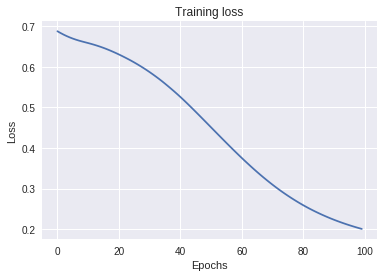

In [259]:
# Plot error curve
plt.title('Training loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(loss_arr)
plt.show()

Plot the decision bounday

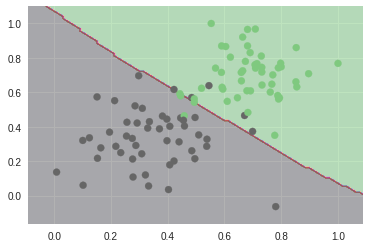

In [260]:
out = model(X_tensor)
plot_results(model,X_tensor,y_tensor.numpy(), out)

Animation 

In [0]:
from matplotlib import animation, rc
from IPython.display import HTML

**Accuracy**

Accuracy is one of the metrics for evaluating classification models. It is defined as:


$ Accuracy=\frac{\text{Number of correct predictions}}{\text{Total number of predictions}} $


In [0]:
# Custom function to calculate accuracy
def calculate_accuracy(y_hat, Y):
  return np.sum(Y.reshape(-1,1)==y_hat) / len(Y)

In [0]:
fig,ax = plt.subplots()

def animate(i):
    ax.clear()
    X_test = X_tensor
    Y_test = y_tensor.numpy()
    y_hat_test = out_arr[i]
    y_hat_test_class = np.where(y_hat_test<0.5, 0, 1)

    # Plot the decision boundary
    ax.contourf(XX, YY, Z_arr[i], cmap=plt.cm.Accent, alpha=0.5)
    ax.scatter(X_test[:,0], X_test[:,1], c=Y_test.reshape(-1), 
                cmap=plt.cm.Accent)
    cont = ax.set_title('Epoch : %03d    Accuracy: %.2f'%(i,calculate_accuracy(y_hat_test_class, Y_test) * 100))
    return cont
plt.close() # Dont plot because we want the animation

In [264]:
ani = animation.FuncAnimation(fig,animate,100,interval=200,blit=False)
HTML(ani.to_html5_video())